<h1><center> Double Pendulum </center></h1>

<center>Lois Fernández Míguez</center>

# Introduction

Let's consider a double pendulum with variables defined as the following Figure

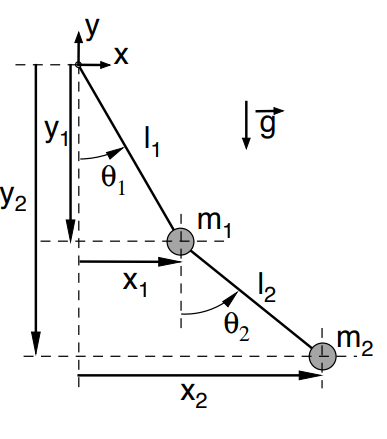

In this specific system, we can define the variables

<center>$x_1=+l_1\sin{\theta_1},\qquad x_2=+l_1\sin{\theta_1}+l_2\sin{\theta_2} \\
 y_1=-l_1\cos{\theta_1},\qquad y_2=-l_1\cos{\theta_1}-l_2\cos{\theta_2}$</center>

With this in mind, the dynamics of the pendulum can be described by the following differential equations

<center>$\ddot{\theta}_1=\frac{-bc\dot{\theta}^2_1+bf-ce\dot{\theta}^2_2-de}{ae-b^2}$</center>

<center>$\ddot{\theta}_2=\frac{bc\dot{\theta}^2_2+bd+ca\dot{\theta}^2_1-af}{ae-b^2}$</center>

where

<center>
$a=(m_1+m_2)l^2_1 \\
 b=m_2l_1l_2\cos{(\theta_1-\theta_2)}\\
 c=m_2l_1l_2\sin{(\theta_1-\theta_2)} \\
 d=(m_1+m_2)gl_1\sin{\theta_1} \\
 e=m_2l^2_2 \\
 f=m_2gl_2\sin{\theta_2} \\
$
</center>

# Necessary Libraries

For this notebook to work the following libraries are needed:
 - numpy
 - scipy
 - matplotlib
 - ffmpeg

It is usual (at least for physicist) to have the first 3. However the reader may need to install ffmpeg. If you are using Anaconda you can install it by opening your prompt and using the command:

*conda install -c conda-forge ffmpeg*

Or, alternatively, if you use are using an environment with pip

*pip install ffmpeg-python*

Now let's import all the necesary libraries

In [40]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.integrate   as si

from matplotlib             import animation
from matplotlib             import rc
rc('animation', html='html5')

# Variables

Let's set up a few variables to tinker with that will let us observe different outputs. All magnitudes are considered to be represented in the International System of Units

First of all let's set up the physical variables; such as the length of the bars and the masses

In [41]:
l1 = 10  # length of the upper bar
m1 = 1   # mass of the upper weight
l2 = 10  # length of the lower bar
m2 = 5   # mass of the lower weight
g  = 9.81 # gravity

Now, let's set up the time interval and the initial conditions.

In [42]:
# Time Interval
tini = 0   # Starting time
tfin = 100 # Ending time


# Initial Conditions
tta1ini   = np.pi/3 # theta1 value at the initial time
tta2ini   = 0       # theta2 value at the initial time
alpha1ini = -1.5    # derivative of theta1 value at the initial time
alpha2ini = 2.5     # derivative of theta2 value at the initial time

# Solving the ODE

To solve the ODE we need to transform the second order ODEs to a system of first order ODEs through the variable change:

<center>$\dot{\theta}_i=\alpha_i$</center>

Let's begin by defining a function with the ODEs in it

In [43]:
def pendynamics(var,t):
    tta1, tta2, alpha1, alpha2 = var
    
    # We define the following variables for clarity
    a = (m1+m2)*l1**2
    b = m2*l1*l2*np.cos(tta1-tta2)
    c = m2*l1*l2*np.sin(tta1-tta2)
    d = g*l1*np.sin(tta1)*(m1+m2)
    e = m2*l2**2
    f = m2*l2*g*np.sin(tta2)
    
    # And the actual system of ODEs
    dtta1dt = alpha1
    dtta2dt = alpha2
    dalpha1dt = (-b*c*alpha1**2+b*f-c*e*alpha2**2-d*e)/(a*e-b**2)
    dalpha2dt = (b*c*alpha2**2+b*d+c*a*alpha1**2-a*f)/(a*e-b**2)
    
    return dtta1dt,dtta2dt,dalpha1dt,dalpha2dt

Now, the actual solving of the ODE for every $t$ step will give us $\theta_1(t),\ \theta_2(t),\ \dot{\theta}_1(t),\ \dot{\theta}_2(t)$

In [44]:
t = np.linspace(tini,tfin,6000) # Timesteps

sol = si.odeint(pendynamics,[tta1ini,tta2ini,alpha1ini,alpha2ini],t) #ODE solver

tta1,tta2,alpha1,alpha2 = sol.T # Parameters


And now we translate those coordinates into the cartesian coordinates of the masses

In [45]:
x1 = l1*np.sin(tta1)
y1 = -l1*np.cos(tta1)
x2 = l1*np.sin(tta1)+l2*np.sin(tta2)
y2 = -l1*np.cos(tta1)-l2*np.cos(tta2)

# Representation

First of all, we initialize the figure and axis

In [46]:
# Figure
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=None, bottom=0.15, right=None, top=0.9,
                    wspace=None, hspace=0.6)


# Axis
e = 0.5 # Quantity to adjust a little extra room in the axis for plotting

ax1 = fig.add_subplot(111, aspect='equal', autoscale_on=False)
ax1.set_xlim(-l1-l2-e, l1+l2+e)
ax1.set_ylim(-l1-l2-e, l1+l2+e)
ax1.axis('off')
ax1.set_title('Double Pendulum',fontsize=30)
plt.close()

Now, we create the figures we are about to plot. We will plot the pendulum, where each mass will have a different color and will leave behind a trace of the path taken.

In [47]:
# Trace
linea1, = ax1.plot(x1[0:1],y1[0:1],'C1',lw=2.5, ls='--')
linea2, = ax1.plot(x2[0:1],y2[0:1],'C2',lw=2.5, ls='--')

# Bars
barra1, = ax1.plot([0,x1[1]],[0,y1[1]],'C0',lw=2.5)
barra2, = ax1.plot([x1[1],x2[1]],[y1[1],y2[1]],'C0',lw=2.5) 

# Masses
eje,   = ax1.plot(0,0,markersize=12,marker='o',linestyle='',color='C0')
masa1, = ax1.plot(x1[0], y1[0],markersize=12*m1**(1/3),marker='o'
                ,linestyle='',color='C1')
masa2, = ax1.plot(x2[0], y2[0],markersize=12*m2**(1/3),marker='o'
                ,linestyle='',color='C2')
plt.close()

And now we animate through the FuncAnimation library

In [48]:
N = 1000 # Frames of the animation

def animar(i):
    linea1.set_data(x1[:i],y1[:i])
    linea2.set_data(x2[:i],y2[:i])
    barra1.set_data([0,x1[i]],[0,y1[i]])
    barra2.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    masa1.set_data(x1[i], y1[i])
    masa2.set_data(x2[i], y2[i])
    
    
    return linea1,linea2,barra1,barra2,masa1, masa2

ani = animation.FuncAnimation(fig, animar,frames=N, interval=20, blit= False,
                              repeat = True)
ani